# Introduction
Pre-processing is always a big part of the deal in Machine Learning applications. Let's try to investigate some common practices when dealing with image processing.

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
pd.options.display.float_format = '{:,.4f}'.format

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import seaborn as sns
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

/home/luca/anaconda3/envs/tensorflow/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/luca/anaconda3/envs/tensorflow/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




## General packages  

In [2]:
from termcolor import colored

## Custom modules

In [2]:
import sys
code_path = "../code"
sys.path.append(code_path)

from config_script import *
import cropper
import augmentation

# Pre-processing
Pre-processing was historically linked to extracting hand-crafter feature from images in the early days of computer vision. 

Nowadays, the approach is changed and these operations are derogate to the network itself. However, there are still some useful common practices which may help the learning process improving performances and generalisation, or maybe just speeding up the training. 

In the following, we will demonstrate how to crop high-resolution images into smaller, more convenient patches. Also, we will show a possible approach to perform data augmentation.

In addition, remind that prior balancing of the dataset is often required in order to enhance generalisation to underrappresented classes/examples.

## Cropping 

Both for increasing the sample size and for a more convenient usage of computing resources, the original images of size 1600x1200 pixels are cropped into square pathces of size 512.

In [4]:
TRAIN_IMG_PATH = RAW_DATA_PATH / "train/all_images/images"





Crops for image Mar20bS1C2R2_VLPAGl_200x_g.TIF


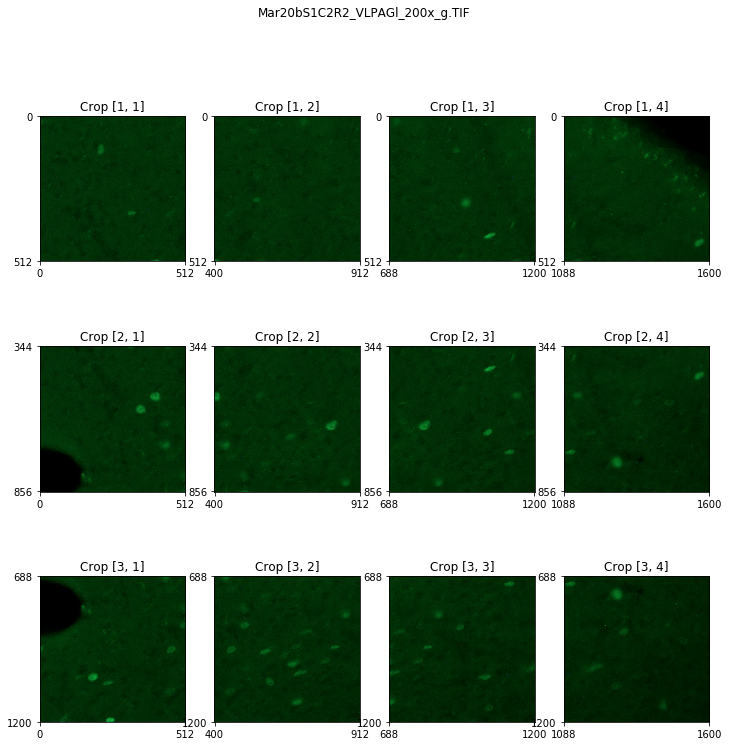





Crops for image Mar21bS1C1R3_VLPAGr_200x_g.TIF


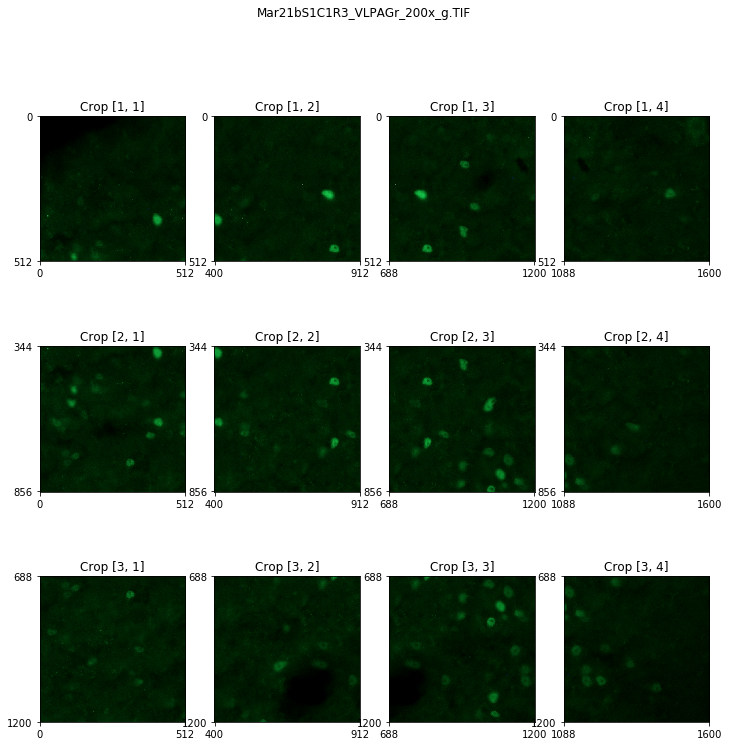





Crops for image RT433S4C1R2_DM_100x_g.TIF


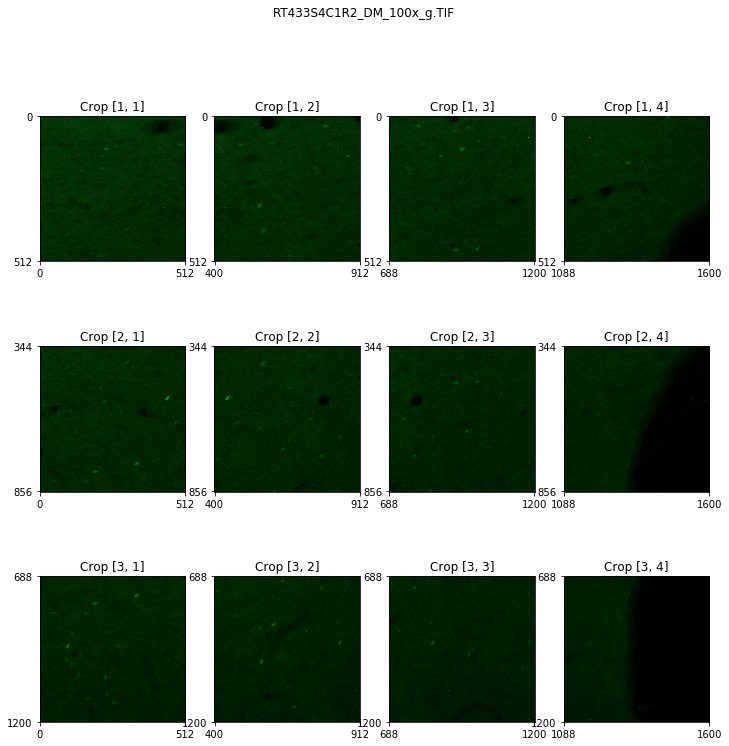





Crops for image RT463S3C3R2_MM_100x_g.TIF


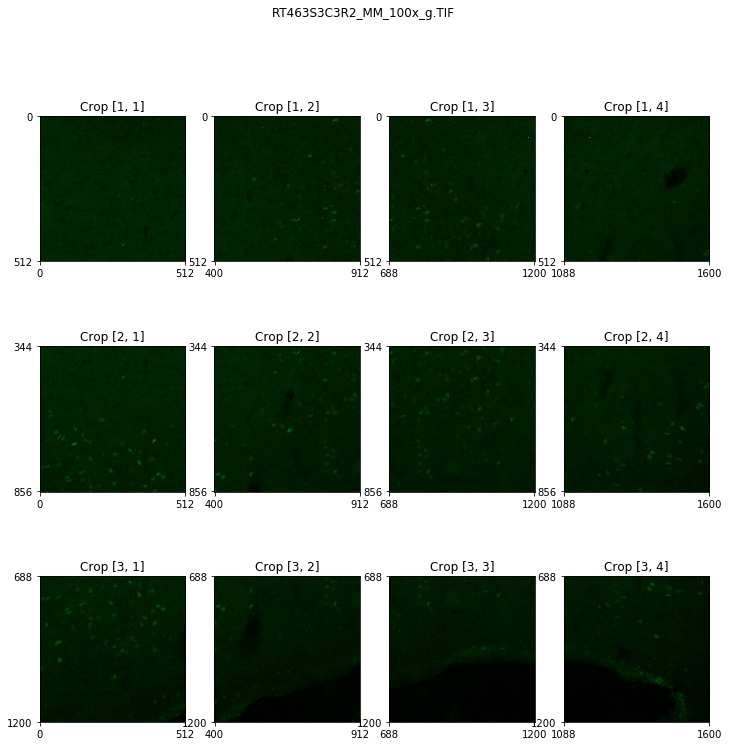

In [5]:
for i, img_name in enumerate(sample_images):
    img_path = SAMPLE_IMG_PATH / img_name
    text = colored("\n\n\n\nCrops for image {}".format(img_name), "red")
    print(text)
    crops = cropper.image_cropper(img_path, crop_size=512, save_path = None, diagnostics=True)

## Augmentation 

In order to help the model to generalise to unseen but plausible patterns, data augmentation is needed.

### Define augmentation pipeline 

**Notice:** paramenters for the single transformations can be changed from the *create_pipeline* function into the *augmentation* module. 

In [4]:
aug_pipeline = augmentation.create_pipeline(
    img_path=SAMPLE_IMG_PATH.absolute(), mask_path=SAMPLE_MASKS_PATH.absolute(), 
    augmented_img_path=SAMPLE_IMG_PATH.absolute())

Initialised with 24 image(s) found.
Output directory set to /home/luca/cell_counting_AML/notebooks/../raw_data_green/sample_images/images.24 ground truth image(s) found.


### Execute the pipeline

The pipeline is executed to obtain 20 transformed images in total.

In [5]:
tot_img = 4
aug_factor = 5

augmentation.make_augmentation(aug_pipeline, tot_img=tot_img, aug_factor=aug_factor)

Processing <PIL.Image.Image image mode=RGB size=732x549 at 0x7FC1C29EB4E0>: 100%|██████████| 20/20 [00:01<00:00, 11.82 Samples/s]  


### Rename augmented images

After the pipeline is executed, we apply some post-processing in order to rename the augmented images in a more intuitive way.

In [6]:
aug_dict = augmentation.augmented_image_dictionary(augmented_img_path=SAMPLE_IMG_PATH, tot_img=tot_img*aug_factor)

64it [00:00, 34078.39it/s]


In [8]:
augmentation.split_augmented_images(aug_dict, augmented_img_path=SAMPLE_IMG_PATH,
                                    image_destination_path=SAMPLE_IMG_PATH, mask_destination_path=SAMPLE_MASKS_PATH)

4it [00:00, 5866.16it/s]


Couldn't find ../raw_data_green/sample_images/images/Mar21bS1C1R3_VLPAGr_200x_g.TIF

Couldn't find ../raw_data_green/sample_images/images/RT433S4C1R2_DM_100x_g.TIF

Couldn't find ../raw_data_green/sample_images/images/RT463S3C3R2_MM_100x_g.TIF

Couldn't find ../raw_data_green/sample_images/images/Mar20bS1C2R2_VLPAGl_200x_g.TIF


### Results

24it [00:00, 73262.95it/s]


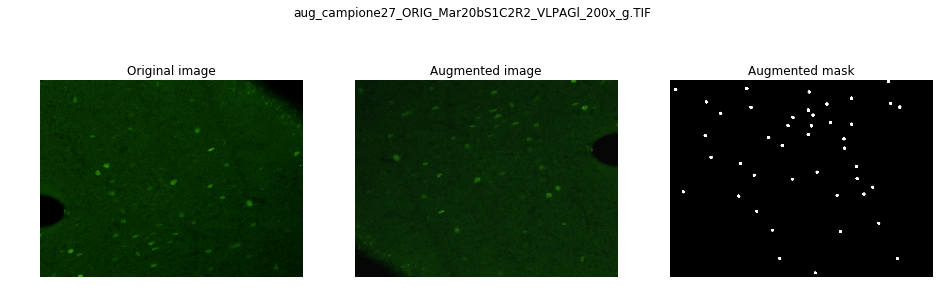

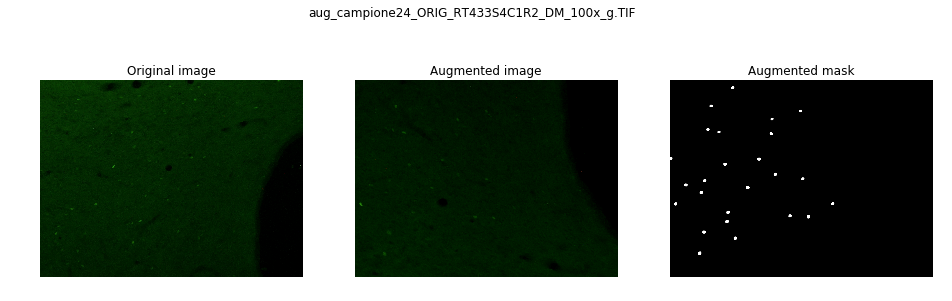

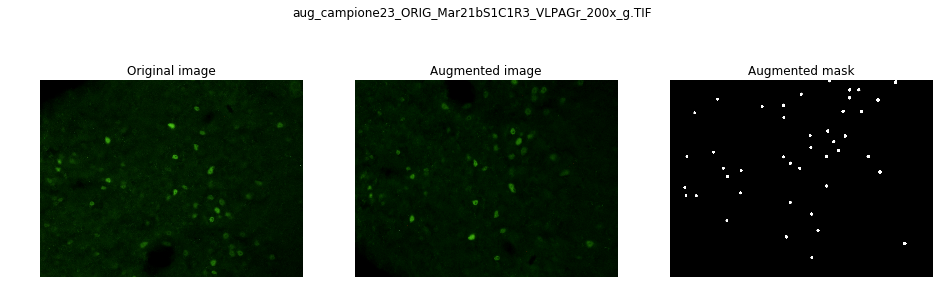

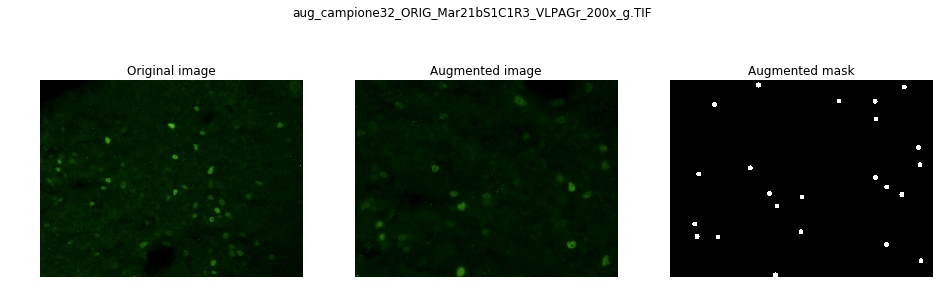

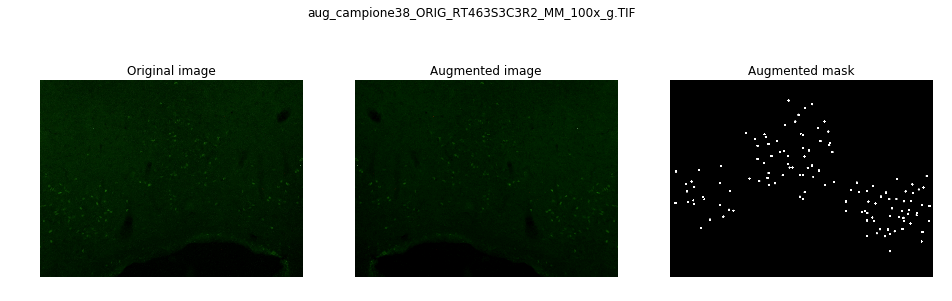

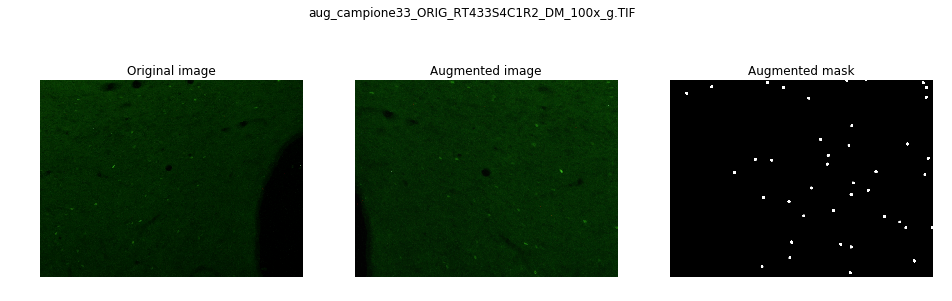

In [10]:
augmentation.plot_augmented_images(augmented_img_path=SAMPLE_IMG_PATH,
                                   augmented_masks_path=SAMPLE_MASKS_PATH, orig_path=SAMPLE_IMG_PATH,
                                   tot_images=6)